In [25]:
# sklearn has built-in iris dataset
# load and store it as numpy array for further matrix calculations in PCA
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
R = np.array(iris.data)
x = pd.DataFrame(iris.data, columns=iris.feature_names)

In [26]:
R

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# Calculate the covariance matrix

In [6]:
# numpy has an API to calculate a covariance matrix
# y-axes will be used for calculations
R_cov = np.cov(R, rowvar=False)

# print the covariance matrix
import pandas as pd
iris_covmat = pd.DataFrame(data=R_cov, columns=iris.feature_names)
iris_covmat.index = iris.feature_names
iris_covmat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [7]:
# Calculate the eigenvalues and eigenvectors

In [8]:
# numpy linear algebra module eig() api
# Compute the eigenvalues and eigenvectors of a square array
eig_values, eig_vectors = np.linalg.eig(R_cov)

# print values and corresponding vectors
print(eig_values)
eig_vectors

[4.22824171 0.24267075 0.0782095  0.02383509]


array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [9]:
# Build new reduced dataset

In [11]:
# pick 2 eigenvectors whose eigenvalues are highest
featureVector = eig_vectors[:,:2]
featureVector

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [24]:
featureVector_t = np.transpose(featureVector)

# R is the original iris dataset
R_t = np.transpose(R)

newDataset_t = np.matmul(featureVector_t, R_t)
newDataset = np.transpose(newDataset_t)

# check the shape of new reduced 2D dataset
newDataset.shape
print(newDataset)

[[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]
 [ 3.2215055  -6.06828303]
 [ 2.68182738 -5.23749119]
 [ 2.87622016 -5.49033754]
 [ 2.6159824  -4.74864082]
 [ 2.82960933 -5.21317833]
 [ 2.99541804 -5.97202148]
 [ 2.8896099  -5.34168252]
 [ 2.71625587 -5.09184058]
 [ 2.27856139 -4.81555799]
 [ 2.85761474 -6.50571721]
 [ 3.1163261  -6.66501491]
 [ 2.87883726 -6.13763209]
 [ 2.85406843 -5.63880172]
 [ 3.30254481 -6.19979162]
 [ 2.91437873 -5.84051289]
 [ 3.19210892 -5.71829851]
 [ 2.9586599  -5.75994864]
 [ 2.28642572 -5.46042065]
 [ 3.19963195 -5.42566143]
 [ 3.14661108 -5.28967072]
 [ 2.99569623 -5.1809357 ]
 [ 3.03354506 -5.45790407]
 [ 2.94004523 -5.69467143]
 [ 2.86283042 -5.63899256]
 [ 2.87037575 -5.12999135]
 [ 2.91496666 -5.12263409]
 [ 3.09243264 -5.73787684]
 [ 2.8535028  -6.1403164 ]
 [ 2.90362838 -6.42009834]
 [ 2.86543825 -5.20563023]
 [ 2.63612348 -5.39631705]
 [ 2.87712708 -5.9263226 ]
 

          PC1       PC2
0    2.818240 -5.646350
1    2.788223 -5.149951
2    2.613375 -5.182003
3    2.757022 -5.008654
4    2.773649 -5.653707
..        ...       ...
145  7.446475 -5.514485
146  7.029532 -4.951636
147  7.266711 -5.405811
148  7.403307 -5.443581
149  6.892554 -5.044292

[150 rows x 2 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64


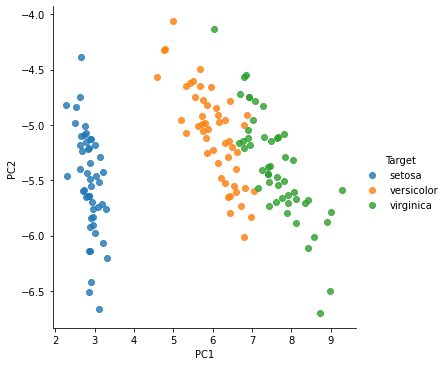

In [16]:
import seaborn as sns
import pandas as pd
%matplotlib inline

# create new DataFrame
df = pd.DataFrame(data=newDataset, columns=['PC1', 'PC2'])
print(df)
print(iris.target)
y = pd.Series(iris.target)
print(y)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virginica')
df['Target'] = y 

# plot 2D data
sns.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg=False, legend=True)